<a href="https://colab.research.google.com/github/Nazaruk-Anton/COVID-19-Genome-Sequencing-Analysis-and-Bit-Score-Prediction/blob/main/Part_2_Feature_Analysis_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-means clustering

In this notebook, we'll cluster sequences to find similar sequences with similar patterns.

In [ ]:
### Loading in libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
### Read in data. We'll store our data in a dataframe called 'df'

df = pd.read_csv('/content/Alignment-HitTable.csv', header = None)
df.columns = ['query acc.verr', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 
             'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
df.head()

,query acc.verr,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,MN997409.1,MN997409.1,100.00,29882,0,0,1,29882,1,29882,0.0,55182
1,MN997409.1,MT020881.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MT020880.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN985325.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,MN975262.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166


In [ ]:
## Fit a K-means clustering with 10 clusters as an inital guess and a random state of 10 on the numeric columns in the dataframe.
## Store the predicted groups in a variable called 'y_pred'. 

df_numeric = df[['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end',
        's. start', 's. end', 'evalue', 'bit score']]

kmeans = KMeans(n_clusters=10, random_state=10).fit(df_numeric)
y_pred = kmeans.predict(df_numeric)
cluster_labels = kmeans.fit_predict(df_numeric)

## Store the silhouette score on the predicted groups in a variable called 'score'.

score = silhouette_score(df_numeric, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
## Store the silhouette scores for clusters 2 to 9 in a list called 'silhouette_scores'.
## Use a random state of 0 for each prediction.

silhouette_scores = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_numeric)
    y_pred = kmeans.predict(df_numeric)
    silhouette_scores.append(silhouette_score(df_numeric, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

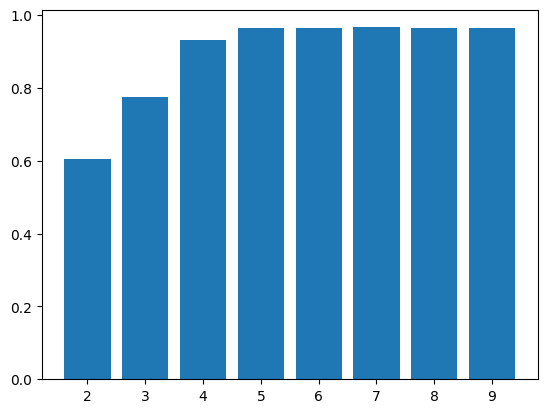

In [ ]:
plt.bar(range(2, len(silhouette_scores) +2), silhouette_scores)
plt.show()

As we can conclude from the graph above, 5 clusters is the optimal choice

In [ ]:
## Use a K-means clustering with 5 clusters on the normalized numeric dataframe. Use a random state of 0.
## Store the cluster centers in a dataframe called 'cluster_centers'. 

# Normalize the numeric dataframe
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df_numeric)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(normalized_df)
y_pred = kmeans.predict(normalized_df)

# Store cluster centers in a dataframe
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, index=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], columns=df_numeric.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


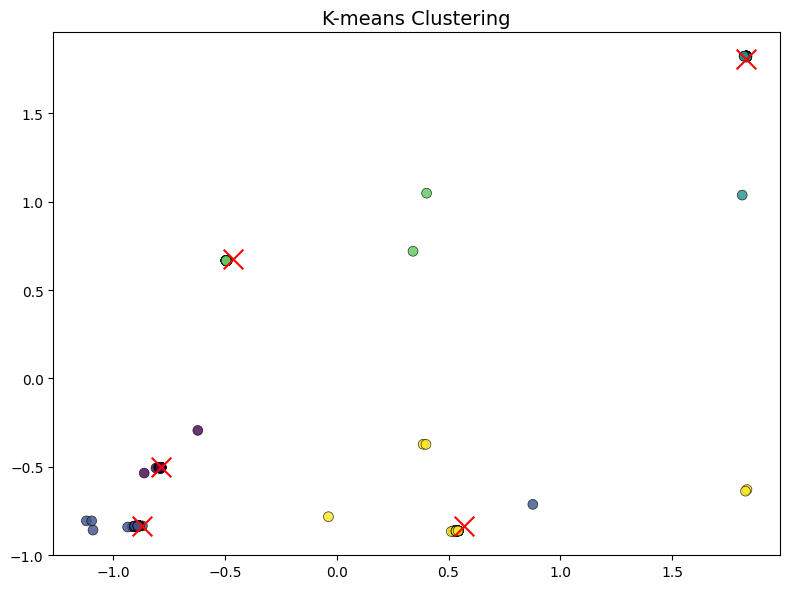

In [ ]:
# Set a custom color palette for the clusters
colors = sns.color_palette('Set1', n_colors=5)

# Scatter plot of the normalized dataframe
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.scatter(normalized_df[:, 0], normalized_df[:, 1], c=y_pred, cmap='viridis', alpha=0.8, s=50, edgecolor='k', linewidths=0.5)
plt.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], marker='x', color='red', s=200)

# Set labels and title
plt.title('K-means Clustering', fontsize=14)


# Show the plot
plt.tight_layout()  # Adjust the spacing between elements
plt.show()
